In [1]:
%matplotlib notebook

In [2]:
from exp_setup_Sol import *

In [3]:
def get_data(fnroot):
    d2s = []
    for det in detectors:
        fn = fnroot % det.extension
        d2 = Data2d(fn)
        d2.set_exp_para(det.exp_para)
        d2s.append(d2)
    return d2s

In [112]:
def azimuthalAverage(rr, dr, ii):
    """
    based on code for
    Calculate the azimuthally averaged radial profile.
    http://www.astrobetter.com/wiki/tiki-index.php?page=python_radial_profiles
    """
    # Get sorted radii
    ind = np.argsort(rr.flat)
    r_sorted = rr.flat[ind]/dr
    i_sorted = ii.flat[ind]

    # Get the integer part of the radii (bin size = 1)
    r_int = r_sorted.astype(int)

    # Find all pixels that fall within each radial bin.
    deltar = r_int[1:] - r_int[:-1]  # Assumes all radii represented
    rind = np.where(deltar)[0]       # location of changed radius
    nr = rind[1:] - rind[:-1]        # number of radius bin

    # Cumulative sum to figure out sums for each radius bin
    csim = np.cumsum(i_sorted, dtype=float)
    tbin = csim[rind[1:]] - csim[rind[:-1]]

    radial_prof = tbin / nr

    return dr*(np.arange(r_int.min(),r_int.max()-1)-0.5),radial_prof


In [5]:
[ds, dw1, dw2] = get_data("data/Sol-b_000018%s")

<IPython.core.display.Javascript object>


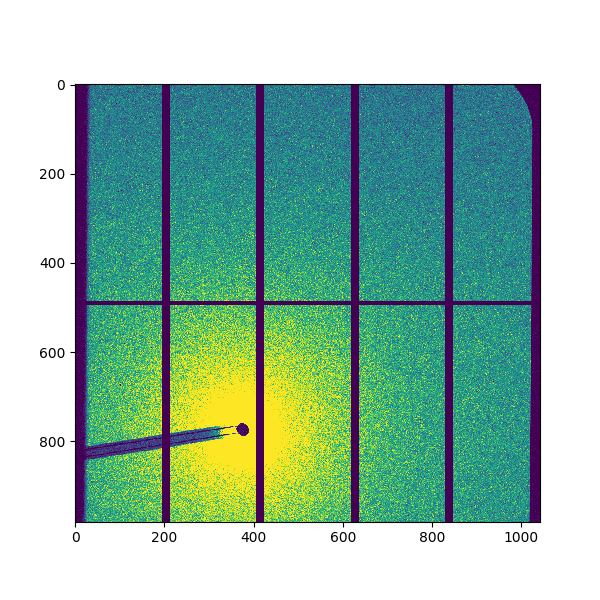

In [7]:
plt.figure(figsize=(6,6))
plt.imshow(ds.data.d)
plt.clim(0, 30)

<IPython.core.display.Javascript object>


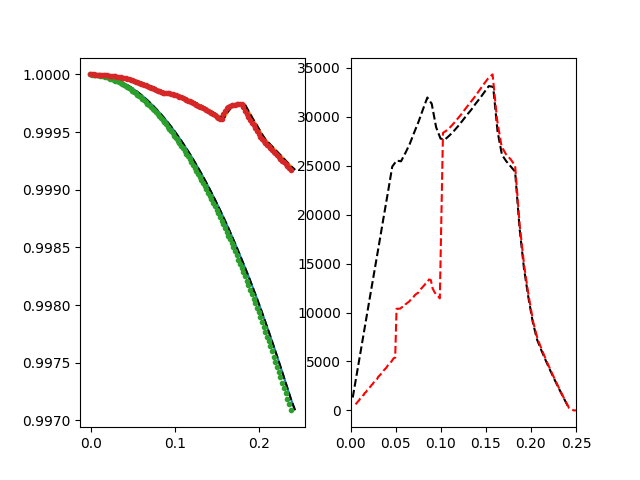

/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in true_divide


(0, 0.25)

In [123]:
qgrid = np.asarray(det_saxs.qgrid, dtype=np.float64)
dd1 = np.asarray(det_saxs.exp_para.FSA.ravel(), dtype=np.float64)
dd2 = np.asarray(det_saxs.exp_para.FPol.ravel(), dtype=np.float64)
qd = np.asarray(det_saxs.exp_para.Q.ravel(), dtype=np.float64)

bins1 = qgrid
bins = 50
"""bins = np.ones(len(qgrid)+1)
bins[0] = qgrid[0]-0.5*(qgrid[1]-qgrid[0])
for i in range(len(qgrid)):
    bins[i+1] = 2*qgrid[i]-bins[i]
"""
norm,edges = np.histogram(qd, bins=bins, weights=np.ones(len(qd)), density=False) 
Iq1,edges = np.histogram(qd, bins=bins, weights=dd1, density=False)
Iq2,edges = np.histogram(qd, bins=bins, weights=dd2, density=False)
norm1,edges1 = np.histogram(qd, bins=bins1, weights=np.ones(len(qd)), density=False) 
Iq1a,edges1 = np.histogram(qd, bins=bins1, weights=dd1, density=False)
Iq2a,edges1 = np.histogram(qd, bins=bins1, weights=dd2, density=False)

q2,Iq1b = azimuthalAverage(qd, 0.002, dd1)
q2,Iq2b = azimuthalAverage(qd, 0.002, dd2)

q = (edges[1:]+edges[:-1])/2
q1 = (edges1[1:]+edges1[:-1])/2

plt.figure()
plt.subplot(121)
plt.plot(q,Iq1/norm)
plt.plot(q,Iq2/norm)
plt.plot(q1, Iq1a/norm1, "k--")
plt.plot(q1, Iq2a/norm1, "k--")
plt.plot(q2, Iq1b, ".")
plt.plot(q2, Iq2b, ".")
plt.subplot(122)
plt.plot(q,norm, "k--")
plt.plot(q1,norm1, "r--")
plt.xlim([0,0.25])

<IPython.core.display.Javascript object>


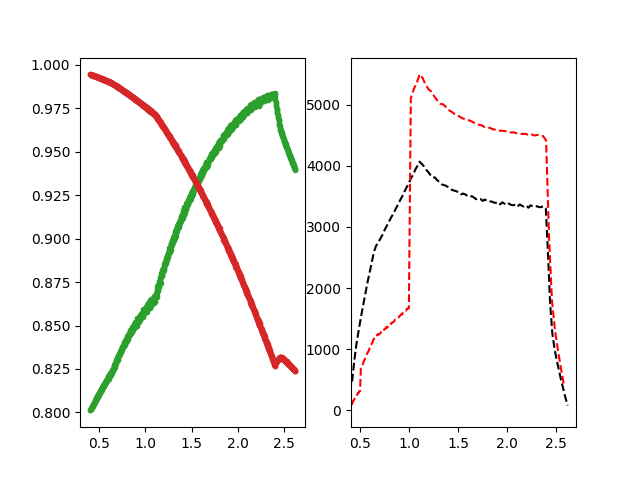

/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in true_divide


(0.4, 2.7)

In [122]:
qgrid = np.asarray(det_waxs1.qgrid, dtype=np.float32)
dd1 = np.asarray(det_waxs1.exp_para.FSA.ravel(), dtype=np.float32)
dd2 = np.asarray(det_waxs1.exp_para.FPol.ravel(), dtype=np.float32)
qd = np.asarray(det_waxs1.exp_para.Q.ravel(), dtype=np.float32)

bins1 = qgrid
bins = 100
"""bins = np.ones(len(qgrid)+1)
bins[0] = qgrid[0]-0.5*(qgrid[1]-qgrid[0])
for i in range(len(qgrid)):
    bins[i+1] = 2*qgrid[i]-bins[i]
"""
norm,edges = np.histogram(qd, bins=bins, weights=np.ones(len(qd)), density=False) 
Iq1,edges = np.histogram(qd, bins=bins, weights=dd1, density=False)
Iq2,edges = np.histogram(qd, bins=bins, weights=dd2, density=False)
norm1,edges1 = np.histogram(qd, bins=bins1, weights=np.ones(len(qd)), density=False) 
Iq1a,edges1 = np.histogram(qd, bins=bins1, weights=dd1, density=False)
Iq2a,edges1 = np.histogram(qd, bins=bins1, weights=dd2, density=False)

q2,Iq1b = azimuthalAverage(qd, 0.002, dd1)
q2,Iq2b = azimuthalAverage(qd, 0.002, dd2)

q = (edges[1:]+edges[:-1])/2
q1 = (edges1[1:]+edges1[:-1])/2

plt.figure()
plt.subplot(121)
plt.plot(q,Iq1/norm)
plt.plot(q,Iq2/norm)
plt.plot(q1, Iq1a/norm1, "k--")
plt.plot(q1, Iq2a/norm1, "k--")
plt.plot(q2, Iq1b, ".")
plt.plot(q2, Iq2b, ".")

plt.subplot(122)
plt.plot(q,norm, "k--")
plt.plot(q1,norm1, "r--")
plt.xlim([0.4,2.7])

In [120]:
dd1.max()

0.99982744

<IPython.core.display.Javascript object>


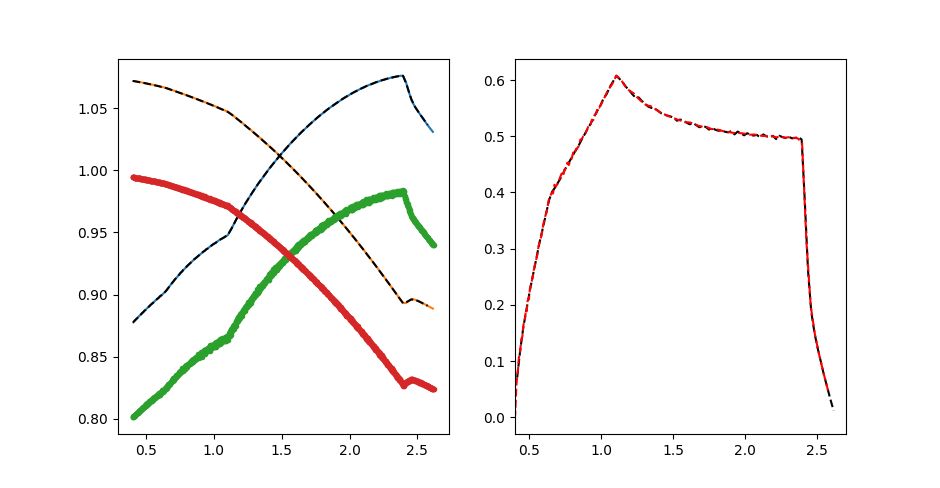

/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in true_divide


(0.4, 2.7)

In [118]:
qgrid = np.asarray(det_waxs1.qgrid, dtype=np.float64)
dd1 = np.asarray(det_waxs1.exp_para.FSA.ravel(), dtype=np.float64)
dd2 = np.asarray(det_waxs1.exp_para.FPol.ravel(), dtype=np.float64)
qd = np.asarray(det_waxs1.exp_para.Q.ravel(), dtype=np.float64)

bins1 = qgrid
bins = 100
"""bins = np.ones(len(qgrid)+1)
bins[0] = qgrid[0]-0.5*(qgrid[1]-qgrid[0])
for i in range(len(qgrid)):
    bins[i+1] = 2*qgrid[i]-bins[i]
"""
norm,edges = np.histogram(qd, bins=bins, weights=np.ones(len(qd)), density=True) 
Iq1,edges = np.histogram(qd, bins=bins, weights=dd1, density=True)
Iq2,edges = np.histogram(qd, bins=bins, weights=dd2, density=True)
norm1,edges1 = np.histogram(qd, bins=bins1, weights=np.ones(len(qd)), density=True) 
Iq1a,edges1 = np.histogram(qd, bins=bins1, weights=dd1, density=True)
Iq2a,edges1 = np.histogram(qd, bins=bins1, weights=dd2, density=True)

q2,Iq1b = azimuthalAverage(qd, 0.002, dd1)
q2,Iq2b = azimuthalAverage(qd, 0.002, dd2)

q = (edges[1:]+edges[:-1])/2
q1 = (edges1[1:]+edges1[:-1])/2

plt.figure()
plt.subplot(121)
plt.plot(q,Iq1/norm)
plt.plot(q,Iq2/norm)
plt.plot(q1, Iq1a/norm1, "k--")
plt.plot(q1, Iq2a/norm1, "k--")
plt.plot(q2, Iq1b, ".")
plt.plot(q2, Iq2b, ".")

plt.subplot(122)
plt.plot(q,norm, "k--")
plt.plot(q1,norm1, "r--")
plt.xlim([0.4,2.7])

<IPython.core.display.Javascript object>


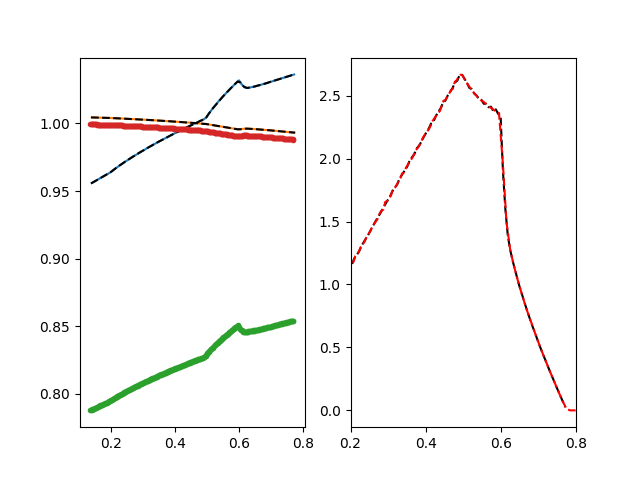

/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide
/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:31: RuntimeWarning: invalid value encountered in true_divide


(0.2, 0.8)

In [116]:
qgrid = np.asarray(det_waxs2.qgrid, dtype=np.float64)
dd1 = np.asarray(det_waxs2.exp_para.FSA.ravel(), dtype=np.float64)
dd2 = np.asarray(det_waxs2.exp_para.FPol.ravel(), dtype=np.float64)
qd = np.asarray(det_waxs2.exp_para.Q.ravel(), dtype=np.float64)

bins1 = qgrid
bins = 100
"""bins = np.ones(len(qgrid)+1)
bins[0] = qgrid[0]-0.5*(qgrid[1]-qgrid[0])
for i in range(len(qgrid)):
    bins[i+1] = 2*qgrid[i]-bins[i]
"""
norm,edges = np.histogram(qd, bins=bins, weights=np.ones(len(qd)), density=True) 
Iq1,edges = np.histogram(qd, bins=bins, weights=dd1, density=True)
Iq2,edges = np.histogram(qd, bins=bins, weights=dd2, density=True)
norm1,edges1 = np.histogram(qd, bins=bins1, weights=np.ones(len(qd)), density=True) 
Iq1a,edges1 = np.histogram(qd, bins=bins1, weights=dd1, density=True)
Iq2a,edges1 = np.histogram(qd, bins=bins1, weights=dd2, density=True)

q2,Iq1b = azimuthalAverage(qd, 0.002, dd1)
q2,Iq2b = azimuthalAverage(qd, 0.002, dd2)

q = (edges[1:]+edges[:-1])/2
q1 = (edges1[1:]+edges1[:-1])/2

plt.figure()
plt.subplot(121)
plt.plot(q,Iq1/norm)
plt.plot(q,Iq2/norm)
plt.plot(q1, Iq1a/norm1, "k--")
plt.plot(q1, Iq2a/norm1, "k--")
plt.plot(q2, Iq1b, ".")
plt.plot(q2, Iq2b, ".")

plt.subplot(122)
plt.plot(q,norm, "k--")
plt.plot(q1,norm1, "r--")
plt.xlim([0.2,0.8])

In [45]:
dd

array([ 0.75895474,  0.7594298 ,  0.75990461, ...,  0.98523472,
        0.98525618,  0.98527649])

<IPython.core.display.Javascript object>


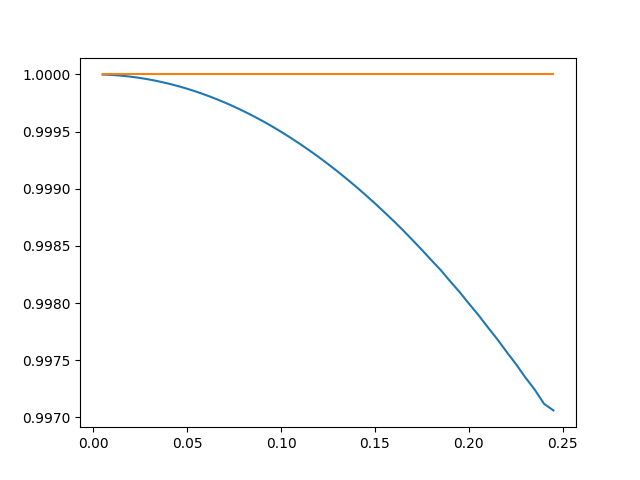

/home/lyang/pro/pyXS2017/py4xs/data2d.py:499: RuntimeWarning: invalid value encountered in sqrt
  dI = np.sqrt(Iq2-Iq*Iq)


In [24]:
plt.figure()

ds.data.d = es.FSA
iq,dI = ds.conv_Iq(det_saxs.qgrid)
idx = ~np.isnan(iq)
plt.plot(det_saxs.qgrid[idx], iq[idx])

ds.data.d = np.ones(es.FSA.shape)
iq,dI = ds.conv_Iq(det_saxs.qgrid)
idx = ~np.isnan(iq)
plt.plot(det_saxs.qgrid[idx], iq[idx])

<IPython.core.display.Javascript object>


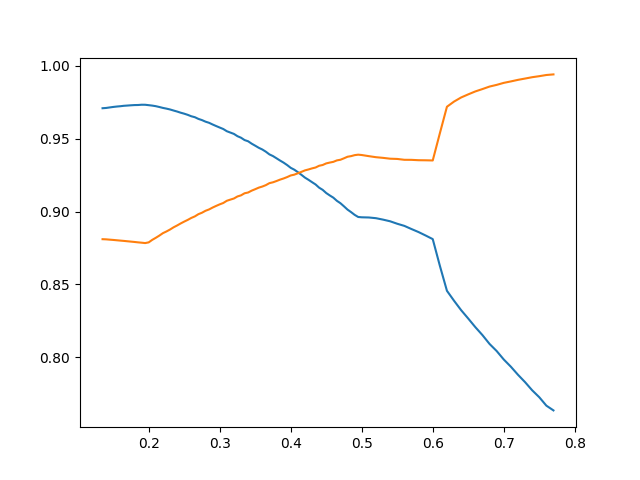

In [27]:
plt.figure()

dw1.data.d = det_waxs1.exp_para.FSA.T
iq,dI = dw1.conv_Iq(det_saxs.qgrid)
idx = ~np.isnan(iq)
plt.plot(det_saxs.qgrid[idx], iq[idx])

dw1.data.d = det_waxs1.exp_para.FPol.T
iq,dI = dw1.conv_Iq(det_saxs.qgrid)
idx = ~np.isnan(iq)
plt.plot(det_saxs.qgrid[idx], iq[idx])


<IPython.core.display.Javascript object>


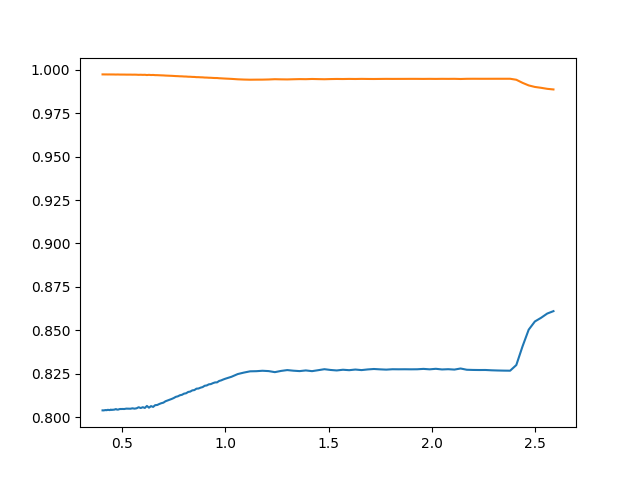

In [29]:
plt.figure()

dw2.data.d = det_waxs2.exp_para.FSA.T
iq,dI = dw2.conv_Iq(det_saxs.qgrid)
idx = ~np.isnan(iq)
plt.plot(det_saxs.qgrid[idx], iq[idx])

dw2.data.d = det_waxs2.exp_para.FPol.T
iq,dI = dw2.conv_Iq(det_saxs.qgrid)
idx = ~np.isnan(iq)
plt.plot(det_saxs.qgrid[idx], iq[idx])

<IPython.core.display.Javascript object>


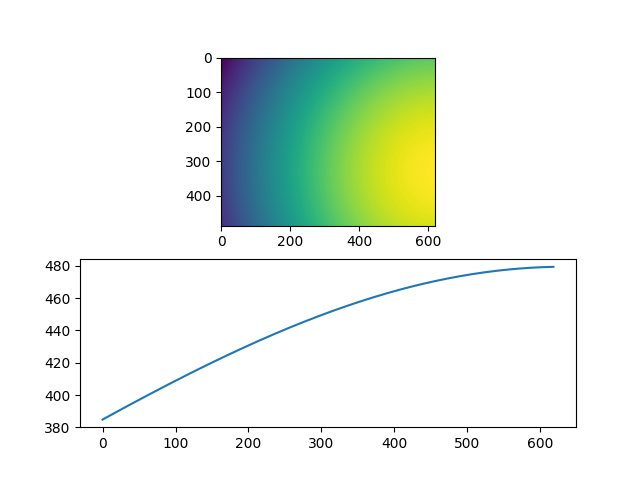

In [33]:
plt.figure()
plt.subplot(211)
plt.imshow(det_waxs1.exp_para.FSA)
plt.subplot(212)
plt.plot(np.sum(det_waxs1.exp_para.FSA, axis=0))

In [124]:
import fabio

In [125]:
f = fabio.open("/home/lyang/Beamlines/LiX/Operations/2017C3/Rutgers/data/B1_000016_WAXS1_00000.cbf")

<IPython.core.display.Javascript object>


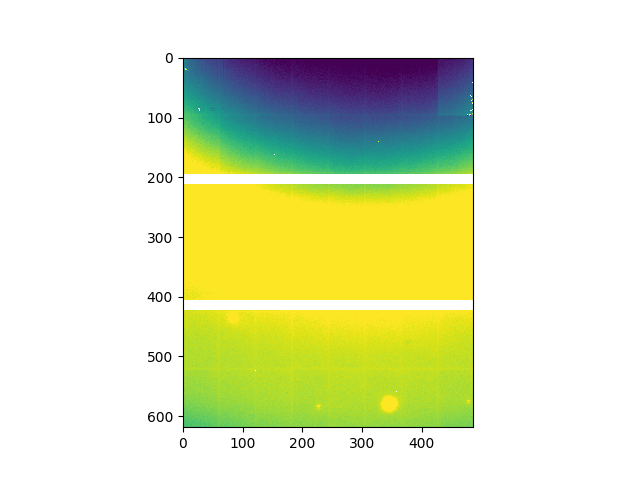

/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app
/home/lyang/miniconda3/envs/py34/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in log
  from ipykernel import kernelapp as app


In [134]:
plt.figure()
plt.imshow(np.log(f.data))
plt.clim(8,9.5)

In [137]:
f.header['_array_data.header_contents'].split("\n")

['# Detector: PILATUS3 300K-500Hz, S/N 3-0172-500Hz\r',
 '# 2017-10-19T14:21:07.259\r',
 '# Pixel_size 172e-6 m x 172e-6 m\r',
 '# Silicon sensor, thickness 0.001000 m\r',
 '# Exposure_time 2.0000000 s\r',
 '# Exposure_period 2.0100000 s\r',
 '# Tau = 0 s\r',
 '# Count_cutoff 1142345 counts\r',
 '# Threshold_setting: 6500 eV\r',
 '# Gain_setting: autog (vrf = 1.000)\r',
 '# N_excluded_pixels = 12\r',
 '# Excluded_pixels: badpix_mask.tif\r',
 '# Flat_field: FF_p3-0172-500Hz_E20000_T6500_vrf_m0p100.tif\r',
 '# Trim_file: p3-0172-500Hz_E20000_T6500.bin\r',
 '# Image_path: /ramdisk/\r',
 '# Comment: uid=c5e2b77b-3274-4826-85da-e84d2edd8091\r',
 '# Ratecorr_lut_directory: ContinuousStandard_v1.1\r',
 '# Retrigger_mode: 1\r',
 '# Wavelength 0.61995 A\r',
 '# Energy_range (0, 0) eV\r',
 '# Detector_distance 1.00000 m\r',
 '# Detector_Voffset 0.00000 m\r',
 '# Beam_xy (0.00, 0.00) pixels\r',
 '# Flux 0.000000\r',
 '# Filter_transmission 1.0000\r',
 '# Start_angle 0.0000 deg.\r',
 '# Angle_incr

In [138]:
np.hstack((0.1076*np.arange(1,10), [1.37]))

array([ 0.1076,  0.2152,  0.3228,  0.4304,  0.538 ,  0.6456,  0.7532,
        0.8608,  0.9684,  1.37  ])